In [0]:
#@title Copyright 2019 Google LLC. { display-mode: "form" }
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Working Group Main Model Template (updated 10/10/19)




# Introduction (updated 10/10/19)

This is an Earth Engine <> TensorFlow demonstration notebook.  Specifically, this notebook shows:

1.   Colab Setup and Authenticate Preparing the data for use in a TensorFlow model.
3.   Distingushing Data Lables i.e Categoical/Continous and/or Points/Polygons. 
4.   Splitting data (Training, Testing, and Validation).
5.   Incorperating ModelFeatures via Google Earth Engine Assests
6.   Employing a variety of Modeling approaches (Segementation: DNN, CNN, FCNN, UNet; ** Object Detection: UNDER DEVELOPMENT** )
7.   Outline Continous/ Categorical outputs process
8.   Assessing Model Output: Categorical Overall Accuracy ** TensorBoard: UNDER DEVELOPMENT** 
9.   Test Models: Validation Data
10.  Export, Run Visualize Model(s) through: AI Platform, Google Bucket, and Local approaches


# Selecting a Modeling Framework

When approaching Neural Networks you should be asking the following questions:

1.   What is the preferred input data (Points or Polygons)?
2.   Which model to use (i.e CNN, DNN, FCNN, U-Net)?
3.   What is the prediction type (Continous or Categorical)?









## Workflow: Selecting a Modeling Framework
*  Found here for edits: https://docs.google.com/drawings/d/10LpFTTp03OtKxow6S8EnF_dm1QWjEpAMaDQkMD6tcs4/edit?usp=sharing
*  to upload -> file-> publish to the web-> Select embeded -> copy in the link

<img src="https://docs.google.com/drawings/d/e/2PACX-1vQmwy5Aqt9QS7JVmNez8JEe9ZFcvCqzTG4xkYpH4Mz3xFtoomPtCTipudddGqUCO15q8D60O9SEBXhV/pub?w=1235&amp;h=923">


## TensorFlow Google Ecosystem Workflow (add ecosystem image 10/19/19)

 For edits: !(https://drive.google.com/open?id=14W51sBKFKP0LPpzrINVsEDQdTwq6dd8i5iDMsxEQGMI
 
 <img src="https://docs.google.com/drawings/d/e/2PACX-1vSwBaEVIbVCVqUsQxXdykz6HHGWiq3VKeTTwk8tmvHDyShMFFZbDd6wz5yGqwfTuj8fkO71O_WMl5eW/pub?w=1060&amp;h=1015">




---
# Below are Examples using Points and Polygons input to generate models
---

---
# Example 1: Point, DNN, Categorical (1-Class), Categorical Cross Entropy, Softmax Activation, 1- Node
---


Edit: https://docs.google.com/drawings/d/1boEPxc8yLAKQGtReKnKkugh0qf1smXmDTBfeNHKg4xc/edit

<img src="https://docs.google.com/drawings/d/e/2PACX-1vQFVPTzB85yAoPcvYCMnIk-euiQc0SbQe82TLeJx4rbFRnTuQh8N1dCPyqZyyZOlhp2mcvkLuMvJa07/pub?w=921&amp;h=464">


Selecting a Modeling Framework: 1.   What is the preferred input data?

#### Colab Setup
![alt text](https://colab.research.google.com/img/colab_favicon.ico)

Colab is a FREE, Jupyter notebook style, python interface. To maximize the efficacy of COLAB:
>**Edit-> Notebook settings-> select python 3 and GPU as  Hardware accelerator**

### Install the Earth Engine client library

This only needs to be done once per notebook.

In [0]:
!pip install earthengine-api

### Authentication


![alt text](https://icons-for-free.com/iconfiles/png/128/key+password+unlock+icon-1320190846512238901.png) **<-Pro Tip icon**


  
**Exceptionally Important**: 
To read/write from a Google Cloud Storage bucket/AI Platform, it's necessary to authenticate (**as yourself**).  You'll also need to authenticate as yourself with Earth Engine, so that you'll have access to your scripts, assets, etc.

**Protip: Use the same Google account between Colab, Cloud, and GEE**

### Authenticate to Colab and Cloud

Identify yourself to Google Cloud, so you have access to storage and other resources.  When you run the code below, it will display a link in the output to an authentication page in your browser.  Follow the link to a page that will let you grant permission to the Cloud SDK to access your resources.  Copy the code from the permissions page back into this notebook and press return to complete the process.

(You may need to run this again if you get a credentials error later.)

In [0]:
from google.colab import auth

auth.authenticate_user()

## Initialize and test the software setup

### Test the Earth Engine installation

![alt text](https://www.google.com/images/icons/product/earth_engine-128.png)

Authenticate to Earth Engine the same way you did to the Colab notebook.  Specifically, run the code to display a link to a permissions page.  This gives you access to your Earth Engine account.  Copy the code from the Earth Engine permissions page back into the notebook and press return to complete the process.

In [0]:
# Import the Earth Engine API and initialize it.
import ee

ee.Authenticate()
ee.Initialize()

# Test the earthengine command by getting help on upload.
!earthengine upload image -h

### Test the TensorFlow installation

![alt text](
https://data.apkhere.com/5d/cc.nextlabs.tensorflow/1.0.3/icon.png!s)

The default public runtime already has the tensorflow libraries we need installed.  Before any operations from the TensorFlow API are used, import TensorFlow and enable eager execution.  This provides an imperative interface that can help with debugging.  See the [TensorFlow eager execution guide](https://www.tensorflow.org/guide/eager) or the [`tf.enable_eager_execution()` docs](https://www.tensorflow.org/api_docs/python/tf/enable_eager_execution) for details. 

In [0]:
import tensorflow as tf

tf.enable_eager_execution()
print(tf.__version__)

### Test the Folium installation
![alt text](https://python-visualization.github.io/folium/_images/folium_logo.jpg)

The default public runtime already has the Folium library we will use for visualization.  Import the library, check the version, and define the URL where Folium will look for Earth Engine generated map tiles.

In [0]:
import folium
print(folium.__version__)

# Define the URL format used for Earth Engine generated map tiles.
EE_TILES = 'https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}'

## Preprocess Imagery and Input Data then export as GEE Asset
![alt text](https://icons-for-free.com/iconfiles/png/128/key+password+unlock+icon-1320190846512238901.png)![alt text](http://www.i2clipart.com/cliparts/b/3/f/6/clipart-stop-sign-128x128-b3f6.png)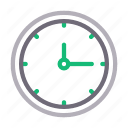

![alt text](https://www.google.com/images/icons/product/earth_engine-128.png)
![alt text](https://python-visualization.github.io/folium/_images/folium_logo.jpg)

Examples below displays the Sentinel 2 Surface Reflectance composite imagery for a small area in Vietnam which will be used to model rice.

Second code block displays the FeatureCollection containing input rice points with a label 

Generating complte composites and prepped input to call into the workflow is a **KEY** method for capitalizing on the Google modeling ecosystem.




In [0]:
# Use folium to visualize the imagery.
# the image is in float
image = ee.Image('users/phamngochairs/NB_S2A_Spectral_2018_2018')
vietnam = ee.FeatureCollection('users/servirmekong/countries/VNM_adm1')
deltaProvience = ['Dong Thap', 'Tien Giang', 'Vinh Long', 'Tra Vinh', 'An Giang', 'Can Tho', 'Hau Giang', 'Soc Trang', 'Bac Lieu', 'Kien Giang', 'Ben Tre', 'Long An'];
geometry = vietnam.filter(ee.Filter.inList('VARNAME_1', deltaProvience))
bounds = geometry.geometry().bounds()

mapid = image.clip(geometry).getMapId({'bands': ['red', 'green', 'blue'], 'min': 0.05, 'max': 0.3})
map = folium.Map(location=[10.0476915, 105.1530271], zoom_start=9)
folium.TileLayer(
    tiles=EE_TILES.format(**mapid),
    attr='Google Earth Engine',
    overlay=True,
    name='mediod composite',
  ).add_to(map)
map.add_child(folium.LayerControl())
map

In [0]:
# Use folium to visualize the imagery.
# the image is in float
image = ee.Image('users/phamngochairs/NB_S2A_Spectral_2018_2018')
vietnam = ee.FeatureCollection('users/servirmekong/countries/VNM_adm1')
deltaProvience = ['Dong Thap', 'Tien Giang', 'Vinh Long', 'Tra Vinh', 'An Giang', 'Can Tho', 'Hau Giang', 'Soc Trang', 'Bac Lieu', 'Kien Giang', 'Ben Tre', 'Long An'];
geometry = vietnam.filter(ee.Filter.inList('VARNAME_1', deltaProvience))
bounds = geometry.geometry().bounds()

mapid = image.clip(geometry).getMapId({'bands': ['red', 'green', 'blue'], 'min': 0.05, 'max': 0.3})
map = folium.Map(location=[10.0476915, 105.1530271], zoom_start=9)
folium.TileLayer(
    tiles=EE_TILES.format(**mapid),
    attr='Google Earth Engine',
    overlay=True,
    name='mediod composite',
  ).add_to(map)
map.add_child(folium.LayerControl())
map

### Point Data GEE
![alt text](https://www.google.com/images/icons/product/earth_engine-128.png)

*   Building off the Vietnam rice example:
**  Commented out workflow displays how point data can be **Labeled, Prepped, and Split**
*   This is for reference to show how the input data needs to be **Labeled, Prepped, and Split**
*   Moving forward for **YOUR** modeling work, add in a new code block and **Labeled, Prepped, and Split** as needed








In [0]:
label = 'rice'

vietnam = ee.FeatureCollection('users/servirmekong/countries/VNM_adm1')
compositeSentinel2 = ee.Image('users/phamngochairs/NB_S2A_Spectral_2018_2018')

# export training data
aquaculture =  ee.FeatureCollection("users/servirmekong/referenceData/aquaculture");
barren = ee.FeatureCollection("users/servirmekong/referenceData/barren");
cropland = ee.FeatureCollection("users/servirmekong/referenceData/cropland");
deciduousForest = ee.FeatureCollection("users/servirmekong/referenceData/deciduousForest");
evergreen = ee.FeatureCollection("users/servirmekong/referenceData/evergreen_forest");
floodedForest = ee.FeatureCollection("users/servirmekong/referenceData/floodedForest");
plantations = ee.FeatureCollection("users/servirmekong/referenceData/plantations");
grass = ee.FeatureCollection("users/servirmekong/referenceData/grass");
mangroves = ee.FeatureCollection("users/servirmekong/referenceData/mangrove");
mixedForest = ee.FeatureCollection("users/servirmekong/referenceData/mixedForest");
plantations = ee.FeatureCollection("users/servirmekong/referenceData/plantations");
rice = ee.FeatureCollection("users/servirmekong/referenceData/rice")
shrub = ee.FeatureCollection("users/servirmekong/referenceData/shrub")
snow = ee.FeatureCollection("users/servirmekong/referenceData/snow")
water = ee.FeatureCollection("users/servirmekong/referenceData/water")
imperv = ee.FeatureCollection("users/servirmekong/referenceData/imperv")
wetlands = ee.FeatureCollection("users/servirmekong/referenceData/wetlands")
noRice = aquaculture.merge(barren).merge(cropland).merge(deciduousForest).merge(evergreen).merge(floodedForest).merge(plantations).merge(grass).merge(mangroves).merge(mixedForest).merge(shrub).merge(snow).merge(water).merge(imperv).merge(wetlands)

def _set_true_feature(feature):
    return feature.set(label, 1)
  
def _set_false_feature(feature):
    return feature.set(label, 0)

rice = rice.filterBounds(bounds).map(_set_true_feature)

noRice = noRice.filterBounds(bounds).map(_set_false_feature)

features = rice.merge(noRice)

# Sample the image at the points and add a random column.
sample = compositeSentinel2.sampleRegions(
  collection = features, properties = [label], scale = 10).randomColumn()

# Partition the sample approximately 70-30.
training = sample.filter(ee.Filter.lt('random', 0.7))
testing = sample.filter(ee.Filter.gte('random', 0.7))


### Point Data Cloud (continued)
<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100"><img src="https://docs.google.com/drawings/d/e/2PACX-1vSd57P-mUkAvVGyYjrsq-rQsSSIS4aTBN0mMvuX2o9PGxbWXjeEEU9GDSATr8aXZ0Fwp79a3Muypo4u/pub?w=100&amp;h=100">



![alt text](https://icons-for-free.com/iconfiles/png/128/key+password+unlock+icon-1320190846512238901.png)
![alt text](http://www.i2clipart.com/cliparts/b/3/f/6/clipart-stop-sign-128x128-b3f6.png)


Now that there's training and testing data in Earth Engine and you've inspected a couple examples to ensure that the information you need is present, it's time to materialize the datasets in a place where the TensorFlow model has access to them.  You can do that by exporting the training and testing datasets to tables in TFRecord format ([learn more about TFRecord format](https://www.tensorflow.org/tutorials/load_data/tf-records)) in a Cloud Storage bucket ([learn more about creating Cloud Storage buckets](https://cloud.google.com/storage/docs/creating-buckets)).  Note that you need to have write access to the Cloud Storage bucket where the files will be output.

**Go to -> console.cloud.google.com-> select "storage"-> create a bucket**

<img src="https://docs.google.com/drawings/d/e/2PACX-1vRXUEGZzCfJP86_LxzWeCCCGyMwYlED4oN0VBlPraYkZPciDXUTcLrvYbh9YQ9p-QGR1cwtv6PVZBqm/pub?w=764&amp;h=461">

In [0]:
# Just use this bucket, to which you have read access.
outputBucket = 'ricebucket'

**Print the feature names** below to display what you have -> ee.batchExport.table.toCloudStorage()

<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">![alt text](https://colab.research.google.com/img/colab_favicon.ico)



In [0]:
bands = compositeSentinel2.bandNames().getInfo()

# Names for output files.
trainFilePrefix = 'tf_rice_training'
testFilePrefix = 'tf_rice_testing'

# This is list of all the properties we want to export.
featureNames = list(bands)
featureNames.append(label)
print(featureNames)

# Create the tasks.
trainingTask = ee.batch.Export.table.toCloudStorage(
  collection=training,
  description='Training Export',
  fileNamePrefix=trainFilePrefix,
  bucket=outputBucket,
  fileFormat='TFRecord',
  selectors=featureNames)

testingTask = ee.batch.Export.table.toCloudStorage(
  collection=testing,
  description='Testing Export',
  fileNamePrefix=testFilePrefix,
  bucket=outputBucket,
  fileFormat='TFRecord',
  selectors=featureNames)

**Start the task**

In [0]:
# Start the tasks.
trainingTask.start()
testingTask.start()

### Monitor task progress

![alt text](https://www.google.com/images/icons/product/earth_engine-128.png)![alt text](https://image.flaticon.com/icons/png/128/98/98673.png)<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">

You can see all your Earth Engine tasks by listing them.  It's also useful to repeatedly poll a task so you know when it's done.  Here we can do that because this is a relatively quick export.  Be careful when doing this with large exports because it will block the notebook from running other cells until this one completes.

In [0]:
# Print all tasks.
print(ee.batch.Task.list())

# Poll the training task until it's done.
import time 
while trainingTask.active():
  print('Polling for task (id: {}).'.format(trainingTask.id))
  time.sleep(30)
print('Done with training export.')

### Check existence of the exported files
<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">

If you've seen the status of the export tasks change to `COMPLETED`, then check for the existince of the files in the output Cloud Storage bucket.

In [0]:
fileNameSuffix = '.tfrecord.gz'
trainFilePath = 'gs://' + outputBucket + '/' + trainFilePrefix + fileNameSuffix
testFilePath = 'gs://' + outputBucket + '/' + testFilePrefix + fileNameSuffix

print('Found training file.' if tf.gfile.Exists(trainFilePath) 
    else 'No training file found.')
print('Found testing file.' if tf.gfile.Exists(testFilePath) 
    else 'No testing file found.')

### Export the imagery

![alt text](https://www.google.com/images/icons/product/earth_engine-128.png)![alt text](https://image.flaticon.com/icons/png/128/98/98673.png)<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">

You can also export imagery using TFRecord format.  Specifically, export whatever imagery you want to be classified by the trained model into the output Cloud Storage bucket.

In [0]:
imageFilePrefix = 'tf_rice_image'

# Specify patch and file dimensions.
imageExportFormatOptions = {
  'patchDimensions': [256, 256],
  'maxFileSize': 104857600,
  'compressed': True
}

# Setup the task.
imageTask = ee.batch.Export.image.toCloudStorage(
  image=compositeSentinel2,
  description='Image Export',
  fileNamePrefix=imageFilePrefix,
  bucket=outputBucket,
  scale=10,
  fileFormat='TFRecord',
  region=bounds.getInfo()['coordinates'],
  formatOptions=imageExportFormatOptions,
  maxPixels=1E13,
)

In [0]:
# Start the task.
imageTask.start()

### Monitor task progress
<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">

Before making predictions, we need the image export to finish, so block until it does.  This might take a few minutes...

In [0]:
while imageTask.active():
  print('Polling for task (id: {}).'.format(imageTask.id))
  time.sleep(30)
print('Done with image export.')

## Data preparation and pre-processing 
<img src="https://docs.google.com/drawings/d/e/2PACX-1vSjN6dsseY5dVuMePJvMl4Od2IKLCN5rL4yQuUpFOfeKXzFrJsa6oTUr_0Zdo-9oKamOH_f5rIjuN0r/pub?w=490&amp;h=189">

### Read into a `tf.data.Dataset`
<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">

Here we are going to read a file in Cloud Storage into a `tf.data.Dataset`.  ([these TensorFlow docs](https://www.tensorflow.org/guide/premade_estimators#create_input_functions) explain more about reading data into a `Dataset`).  Check that you can read examples from the file.  The purpose here is to ensure that we can read from the file without an error.  The actual content is not necessarily human readable.



In [0]:
# Create a dataset from the TFRecord file in Cloud Storage.
trainDataset = tf.data.TFRecordDataset(trainFilePath, compression_type='GZIP')
# Print the first record to check.
print(iter(trainDataset).next())

### Define the structure of your data
![alt text](https://icons-for-free.com/iconfiles/png/128/key+password+unlock+icon-1320190846512238901.png)![alt text](https://colab.research.google.com/img/colab_favicon.ico)
### [slide](https://docs.google.com/presentation/d/1gVMt2QPX-KWmQ0B9TYkAxksU6fWWac7W7roWChseJe0/edit#slide=id.g626cc8ea58_0_169)

For parsing the exported TFRecord files, `featuresDict` is a mapping between feature names (recall that `featureNames` contains the band and label names) and **`float32`** [`tf.io.FixedLenFeature`](https://www.tensorflow.org/api_docs/python/tf/io/FixedLenFeature) objects.  This mapping is necessary for telling TensorFlow how to read data in a TFRecord file into tensors.  **Specifically, all numeric data exported from Earth Engine is exported as `float32`**.

(Note: *features* in the TensorFlow context (i.e. [`feature.proto`](https://github.com/tensorflow/tensorflow/blob/r1.12/tensorflow/core/example/feature.proto)) are not to be confused with Earth Engine features (i.e. [`ee.Feature`](https://developers.google.com/earth-engine/api_docs#eefeature)), where the former is a protocol message type for serialized data input to the model and the latter is a geometry-based geographic data structure.)

In [0]:
from pprint import pprint
# List of fixed-length features, all of which are float32.
columns = [
  tf.io.FixedLenFeature(shape=[1], dtype=tf.float32) for k in featureNames
]

# Dictionary with names as keys, features as values.
featuresDict = dict(zip(featureNames, columns))

pprint(featuresDict)

###Parse the dataset
Edit: https://docs.google.com/drawings/d/1MK9EYDGM1hWcX1-q-nUfcFeorY-diqVXVsWa21WcSMc/edit

<img src="https://docs.google.com/drawings/d/e/2PACX-1vQssp5M98v7bllX6hN1N1Std6y78aD9R78oBWifGV1W8DfN02EHeMluW57F_SX1i9-TDcXIow9K85jM/pub?w=169&amp;h=168"> ![alt text](https://colab.research.google.com/img/colab_favicon.ico)
### [slide](https://docs.google.com/presentation/d/1gVMt2QPX-KWmQ0B9TYkAxksU6fWWac7W7roWChseJe0/edit#slide=id.g626cc8ea58_0_169)

Now we need to make a parsing function for the data in the TFRecord files.  The data comes in flattened 2D arrays per record and we want to use the first part of the array for input to the model and the last element of the array as the class label.  The parsing function reads data from a serialized `Example` proto (i.e. [`example.proto`](https://github.com/tensorflow/tensorflow/blob/r1.12/tensorflow/core/example/example.proto)) into a dictionary in which the keys are the feature names and the values are the tensors storing the value of the features for that example.  ([Learn more about parsing `Example` protocol buffer messages](https://www.tensorflow.org/programmers_guide/datasets#parsing_tfexample_protocol_buffer_messages)).

In [0]:
def parse_tfrecord(example_proto):
  """The parsing function.

  Read a serialized example into the structure defined by featuresDict.

  Args:
    example_proto: a serialized Example.
  
  Returns: 
    A tuple of the predictors dictionary and the label, cast to an `int32`.
  """
  parsed_features = tf.io.parse_single_example(example_proto, featuresDict)
  labels = parsed_features.pop(label)
  return parsed_features, tf.cast(labels, tf.int32)

# Map the function over the dataset.
parsedDataset = trainDataset.map(parse_tfrecord, num_parallel_calls=5)

# Print the first parsed record to check.
pprint(iter(parsedDataset).next())

![alt text](https://icons-for-free.com/iconfiles/png/128/key+password+unlock+icon-1320190846512238901.png)

Note that each record of the parsed dataset contains a tuple.  The first element of the tuple is a dictionary with bands for keys and the numeric value of the bands for values.  The second element of the tuple is a class label.

### Optional, Example how to add more "features" mid-workflow?
**Create additional features**

![alt text](https://www.google.com/images/icons/product/earth_engine-128.png)![alt text](https://colab.research.google.com/img/colab_favicon.ico)

Another thing we might want to do as part of the input process is to create new features, for example NDVI, a vegetation index computed from reflectance in two spectral bands.  Here are some helper functions for that.

In [0]:
def normalizedDifference(a, b):
  nd = (a - b) / (a + b)
  nd_inf = (a - b) / (a + b + 0.00000001)
  return tf.where(tf.is_finite(nd), nd, nd_inf)

def ratio(a, b):
  nd = a / b
  nd_inf = a / (b + 0.00000001)
  return tf.where(tf.is_finite(nd), nd, nd_inf)

def EVI(NIR, RED, BLUE):
	#Add Enhanced Vegetation Index (EVI)
	evi = 2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))
	return evi


def SAVI(NIR,RED):
	#Add Enhanced Vegetation Index (EVI)
	savi =(NIR - RED) * (1 + 0.5)/(NIR + RED + 0.5)
	return savi


def IBI(RED,GREEN,SWIR1,NIR):
	#Add Index-Based Built-Up Index (IBI)
	ibiA = (2 * SWIR1) / (SWIR1 + NIR)
	ibiB = (NIR / (NIR + RED)) + (GREEN / (GREEN + SWIR1))
	
	ibi = normalizedDifference(ibiA,ibiB)
	return ibi

In [0]:
def addFeatures(features, label):

	features['nd_blue_green'] = normalizedDifference(features['blue'], features['green'])
	features['nd_blue_nir'] = normalizedDifference(features['blue'], features['nir'])
	features['ndvi'] = normalizedDifference(features['nir'], features['red'])
	features['ndwi'] = normalizedDifference(features['green'], features['nir'])
	features['nd_swir1_swir2'] = normalizedDifference(features['swir1'], features['swir2'])
	features['nd_nir_swir2'] = normalizedDifference(features['nir'], features['swir2'])
	features['ratio_swir1_nir'] = ratio(features['swir1'], features['nir'])
	features['ratio_red_swir1'] = ratio(features['red'], features['swir1'])
	features['evi'] = EVI(features['nir'], features['red'],features['blue'])
	features['savi'] = SAVI(features['nir'], features['red'])
	features['ibi'] = IBI(features['red'],features['green'],features['swir1'],features['nir'])

	return features, label

## DNN Model setup

<img src="https://docs.google.com/drawings/d/e/2PACX-1vTM_GRj4rQBmXKKDfi_haM8PP_RfAkmCX_i8v-lsQ6y_mHmkbbsn1Oj77GWqhqazKVvLHQSGTccezdi/pub?w=296&amp;h=196">

The basic workflow for classification in TensorFlow is:

1.  Create the model.
2.  Train the model (i.e. `fit()`).
3.  Use the trained model for inference (i.e. `predict()`).

Here we'll create a `Sequential` neural network model using Keras.  This simple model is inspired by examples in:

* [The TensorFlow Get Started tutorial](https://www.tensorflow.org/tutorials/)
* [The TensorFlow Keras guide](https://www.tensorflow.org/guide/keras#build_a_simple_model)
* [The Keras `Sequential` model examples](https://keras.io/getting-started/sequential-model-guide/#multilayer-perceptron-mlp-for-multi-class-softmax-classification)

Note that the model used here is purely for demonstration purposes and hasn't gone through any performance tuning.

### Create the Keras model

![alt text](https://colab.research.google.com/img/colab_favicon.ico)


edit: https://docs.google.com/drawings/d/1EKLXzi7GrCtayakiiki1GcKDXaumcq_ksGiEjBnywQE/edit


<img src="https://docs.google.com/drawings/d/e/2PACX-1vTjGDbb6wQzLUKtFDgjkc9nXnF8X1dMXWK5OuYKVK8suuu1r1Hy3DCFWlyrgwhuU0MI7M5jfMcGXoco/pub?w=345&amp;h=332">

Before we create the model, there's still a wee bit of pre-processing to get the data into the right input shape and a format that can be used with cross-entropy loss.  Specifically, Keras expects a list of inputs and a one-hot vector for the class. (See [the Keras loss function docs](https://keras.io/losses/), [the TensorFlow categorical identity docs](https://www.tensorflow.org/guide/feature_columns#categorical_identity_column) and [the `tf.one_hot` docs](https://www.tensorflow.org/api_docs/python/tf/one_hot) for details).  

Here we will use a simple neural network model with a 64 node hidden layer, a dropout layer and an output layer.  Once the dataset has been prepared, define the model, compile it, fit it to the training data.  See [the Keras `Sequential` model guide](https://keras.io/getting-started/sequential-model-guide/) for more details.

In [0]:
from tensorflow import keras

# How many classes there are in the model.
nClasses = 2

# Add features .
inputDataset = parsedDataset.map(addFeatures)

# Keras requires inputs as a tuple.  Note that the inputs must be in the
# right shape.  Also note that to use the categorical_crossentropy loss,
# the label needs to be turned into a one-hot vector.
def toTuple(dict, label):
  #return tf.transpose(list(dict.values())), tf.one_hot(indices=label, depth=nClasses)
  return (tf.expand_dims(tf.transpose(list(dict.values())), 1),
          tf.expand_dims(tf.one_hot(indices=label, depth=nClasses), 1))

# Repeat the input dataset as many times as necessary in batches.
inputDataset = inputDataset.map(toTuple).shuffle(1000).batch(100)

# Define the layers in the model.
model = tf.keras.models.Sequential([
  #tf.keras.layers.Dense(50, activation=tf.nn.relu),
  #tf.keras.layers.Dropout(0.1),
  #tf.keras.layers.Dense(nClasses, activation=tf.nn.softmax)
  tf.keras.layers.Input((None, None, 17,)),
  tf.keras.layers.Conv2D(64, (1, 1), activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (1, 1), activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(nClasses, (1, 1), activation=tf.nn.softmax)
])

# Compile the model with the specified loss function.
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.0075),#'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training data.
# Don't forget to specify `steps_per_epoch` when calling `fit` on a dataset.
training = model.fit(x=inputDataset, epochs=50)

%pylab inline
plot(training.history['loss'],'x--')
plot(training.history['acc'], 'o--')


###Check model accuracy on the test set

![alt text](https://colab.research.google.com/img/colab_favicon.ico)

Now that we have a trained model, we can evaluate it using the test dataset.  To do that, read and prepare the test dataset in the same way as the training dataset.  Here we specify a batch sie of 1 so that each example in the test set is used exactly once to compute model accuracy.  For model steps, just specify a number larger than the test dataset size (ignore the warning).

In [0]:
testDataset = (
  tf.data.TFRecordDataset(testFilePath, compression_type='GZIP')
    .map(parse_tfrecord, num_parallel_calls=5)
    .map(addFeatures)
    .map(toTuple)
    .batch(1)
)

model.evaluate(testDataset)

![alt text](https://icons-for-free.com/iconfiles/png/128/key+password+unlock+icon-1320190846512238901.png) <img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">

Note that the notebook VM is sometimes not heavy-duty enough to get through a whole training job, especially if you have a large buffer size or a large number of epochs. You can still use this notebook for training, but may need to set up an alternative VM (learn more) for production use. Alternatively, you can package your code for running large training jobs on Google's AI Platform as described here. The following code loads a pre-trained model, which you can use for predictions right away.


In [0]:
MODEL_DIR = 'gs://ricebucket/model'
tf.contrib.saved_model.save_keras_model(model, MODEL_DIR)


## Prepare the model for making predictions in Earth Engine

![alt text](https://icons-for-free.com/iconfiles/png/128/key+password+unlock+icon-1320190846512238901.png)

Before we can use the model in Earth Engine, it needs to be hosted by AI Platform.  But before we can host the model on AI Platform we need to ***EEify*** (a new word!) it.  The EEification process merely appends some extra operations to the input and outputs of the model in order to accomdate the interchange format between pixels from Earth Engine (float32) and inputs to AI Platform (base64).  (See [this doc](https://cloud.google.com/ml-engine/docs/online-predict#binary_data_in_prediction_input) for details.)  

### Earth Engine model prepare

![alt text](https://www.google.com/images/icons/product/earth_engine-128.png)![alt text](https://image.flaticon.com/icons/png/128/98/98673.png)<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">

The EEification process is handled for you using the Earth Engine command `earthengine model prepare`.  To use that command, we need to specify the input and output model directories and the name of the input and output nodes in the TensorFlow computation graph.  We can do all that programmatically:

In [0]:
from tensorflow.python.tools import saved_model_utils

meta_graph_def = saved_model_utils.get_meta_graph_def(MODEL_DIR, 'serve')
inputs = meta_graph_def.signature_def['serving_default'].inputs
outputs = meta_graph_def.signature_def['serving_default'].outputs

# Just get the first thing(s) from the serving signature def.  i.e. this
# model only has a single input and a single output.
input_name = None
for k,v in inputs.items():
  input_name = v.name
  break

output_name = None
for k,v in outputs.items():
  output_name = v.name
  break

# Make a dictionary that maps Earth Engine outputs and inputs to 
# AI Platform inputs and outputs, respectively.
import json
input_dict = "'" + json.dumps({input_name: "array"}) + "'"
output_dict = "'" + json.dumps({output_name: "rice"}) + "'"

# Put the EEified model next to the trained model directory.
EEIFIED_DIR = 'gs://ricebucket/eeified'
#PROJECT = 'ee-tf-sandbox'
PROJECT = 'tfproject'

# You need to set the project before using the model prepare command.
!earthengine set_project {PROJECT}
!earthengine model prepare --source_dir {MODEL_DIR} --dest_dir {EEIFIED_DIR} --input {input_dict} --output {output_dict}

## Perform inference using the trained model in Earth Engine

<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">

Before it's possible to get predictions from the trained and EEified model, it needs to be deployed on AI Platform.

1. The first step is to create the model.

2. The second step is to create a version.  See [this guide](https://cloud.google.com/ml-engine/docs/tensorflow/deploying-models) for details.  Note that models and versions can be monitored from the [AI Platform models page](http://console.cloud.google.com/ai-platform/models) of the Cloud Console.  



1. Open the AI Platform models page in the GCP Console:

OPEN MODELS IN THE GCP CONSOLE

2. If needed, create the model to add your new version to:

Click the New Model button at the top of the Models page. This brings you to the Create model page.

Enter a unique name for your model in the Model name box. Optionally, enter a description for your model in the Description field.

Click Create.

Verify that you have returned to the Models page, and that your new model appears in the list.

In [0]:
MODEL_NAME = 'rice_dnn_model'
VERSION_NAME = 'v' + str(int(time.time()))
print('Creating version: ' + VERSION_NAME)

#!gcloud ai-platform models create {MODEL_NAME} --project {PROJECT}
!gcloud ai-platform versions create {VERSION_NAME} \
  --project {PROJECT} \
  --model {MODEL_NAME} \
  --origin {EEIFIED_DIR} \
  --runtime-version=1.14 \
  --framework "TENSORFLOW" \
  --python-version=3.5

**testingspace--tim-10-17-19**

In [0]:
MODEL_NAME = 'rice_dnn_model'
VERSION_NAME = 'v10172019'
print('Creating version: ' + VERSION_NAME)

#!gcloud ai-platform models create {MODEL_NAME} --project {PROJECT}
!gcloud ai-platform versions create {VERSION_NAME} \
  --project {PROJECT} \
  --model {MODEL_NAME} \
  --origin {EEIFIED_DIR} \
  --runtime-version=1.14 \
  --framework "TENSORFLOW" \
  --python-version=3.5

There is now a trained model, prepared for serving to Earth Engine, hosted and versioned on AI Platform.  We can now connect Earth Engine directly to the trained model for inference.  You do that with the **`ee.Model.fromAiPlatformPredictor`** command.




### `ee.Model.fromAiPlatformPredictor`
For this command to work, we need to know a lot about the model.  To connect to the model, you need to know the name and version.

<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">![alt text](https://image.flaticon.com/icons/png/128/98/98673.png)![alt text](https://www.google.com/images/icons/product/earth_engine-128.png) ![alt text](https://python-visualization.github.io/folium/_images/folium_logo.jpg)


### Inputs
You need to be able to recreate the imagery on which it was trained in order to perform inference.  Specifically, you need to create an array-valued input from the scaled data and use that for input.  (Recall that the new input node is named `array`, which is convenient because the array image has one band, named `array` by default.)  The inputs will be provided as 144x144 patches (`inputTileSize`), at 30-meter resolution (`proj`), but 8 pixels will be thrown out (`inputOverlapSize`) to minimize boundary effects.

### Outputs
The output (which you also need to know), is a single float band named `rice`.

In [0]:
# Load the trained model and use it for prediction.
model = ee.Model.fromAiPlatformPredictor(
    projectName = PROJECT,
    modelName = MODEL_NAME,
    version = VERSION_NAME,
    inputTileSize = [144, 144],
    inputOverlapSize = [8, 8],
    proj = ee.Projection('EPSG:4326').atScale(30),
    fixInputProj = True,
    outputBands = {'rice': {
        'type': ee.PixelType.float()
      }
    }
)
predictions = model.predictImage(image.toArray())

# Use folium to visualize the input imagery and the predictions.
mapid = compositeSentinel2.getMapId({'bands': ['red', 'green', 'blue'], 'min': 0.05, 'max': 0.3})
map = folium.Map(location=[10.0476915, 105.1530271], zoom_start=9)

folium.TileLayer(
    tiles=EE_TILES.format(**mapid),
    attr='Google Earth Engine',
    overlay=True,
    name='median composite',
  ).add_to(map)

mapid = predictions.getMapId({'min': 0, 'max': 1})

folium.TileLayer(
    tiles=EE_TILES.format(**mapid),
    attr='Google Earth Engine',
    overlay=True,
    name='predictions',
  ).add_to(map)
map.add_child(folium.LayerControl())
map

---
# Example 2: Polyon, U-Net, etc...........Categorical (1-Class), Categorical Cross Entropy, Softmax Activation, 1- Node
---




**edit:** https://docs.google.com/drawings/d/1PCr_CTWBHlWWNwE6qiL2dSvE85W7gMiW90tVmQvpKOI/edit

<img src="https://docs.google.com/drawings/d/e/2PACX-1vQluuFI6IMIwegv3PqvNqtLm_Lp9nlzBbcnpHvJL_-vi-9COmPqCGPVEKIH6VVtNlABC0FEfbuKmqbL/pub?w=921&amp;h=464">

## Polygon Example Setup

In [0]:
https://code.earthengine.google.com/82f224b504a3d90ac7038e010f6c7793

### Specify your Cloud Storage Bucket
<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">
<img src="https://docs.google.com/drawings/d/e/2PACX-1vSd57P-mUkAvVGyYjrsq-rQsSSIS4aTBN0mMvuX2o9PGxbWXjeEEU9GDSATr8aXZ0Fwp79a3Muypo4u/pub?w=100&amp;h=100">

You must have write access to a bucket to run this demo!  To run it read-only, use the demo bucket below, but note that writes to this bucket will not work.

In [0]:
# This is read-only:
BUCKET = 'rice-mapping-unet'

### Poygon Data Colab Global Variable Setup
![alt text](https://colab.research.google.com/img/colab_favicon.ico) ![alt text](https://www.google.com/images/icons/product/earth_engine-128.png)

No need to run these exports, but just to see how that's done:

The block below used the pre-generated S2 composite saved as a GEE 
assest
*  Resopnse is defined
*  Features are defined
-
Key moving data across the Google Ecosystem is often a challenge 

---Tim move this languge above as key points talking about the changes associated with google ecosystem and patch data

In [0]:
# Specify names locations for outputs in Cloud Storage. 
FOLDER = 'data'
TRAINING_BASE = 'training_patches'
EVAL_BASE = 'eval_patches'

# Specify inputs (Landsat bands) to the model and the response variable.
opticalBands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']
thermalBands = ['B10', 'B11']
BANDS = opticalBands + thermalBands
RESPONSE = 'rice'
FEATURES = BANDS + [RESPONSE]

# Specify the size and shape of patches expected by the model.
KERNEL_SIZE = 256
KERNEL_SHAPE = [KERNEL_SIZE, KERNEL_SIZE]
COLUMNS = [
  tf.io.FixedLenFeature(shape=KERNEL_SHAPE, dtype=tf.float32) for k in FEATURES
]
FEATURES_DICT = dict(zip(FEATURES, COLUMNS))

# Sizes of the training and evaluation datasets.
TRAIN_SIZE = 16000
EVAL_SIZE = 8000

# Specify model training parameters.
BATCH_SIZE = 16
EPOCHS = 10
BUFFER_SIZE = 2000
OPTIMIZER = 'SGD'
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

### [GEE Script](https://code.earthengine.google.com/82f224b504a3d90ac7038e010f6c7793)  used to sample Polygons and generate TF record

![alt text](https://www.google.com/images/icons/product/earth_engine-128.png) ![alt text](https://icons-for-free.com/iconfiles/png/128/key+password+unlock+icon-1320190846512238901.png)



### Imagery From GEE
 ![alt text](https://www.google.com/images/icons/product/earth_engine-128.png)![alt text](https://python-visualization.github.io/folium/_images/folium_logo.jpg)

Gather and setup the imagery to use for inputs (predictors).  This is a three-year, cloud-free, Landsat 8 composite.  Display it in the notebook for a sanity check.

In [0]:
# Use Landsat 8 surface reflectance data.
l8sr = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')

# Cloud masking function.
def maskL8sr(image):
  cloudShadowBitMask = ee.Number(2).pow(3).int()
  cloudsBitMask = ee.Number(2).pow(5).int()
  qa = image.select('pixel_qa')
  mask1 = qa.bitwiseAnd(cloudShadowBitMask).eq(0).And(
    qa.bitwiseAnd(cloudsBitMask).eq(0))
  mask2 = image.mask().reduce('min')
  mask3 = image.select(opticalBands).gt(0).And(
          image.select(opticalBands).lt(10000)).reduce('min')
  mask = mask1.And(mask2).And(mask3)
  return image.select(opticalBands).divide(10000).addBands(
          image.select(thermalBands).divide(10).clamp(273.15, 373.15)
            .subtract(273.15).divide(100)).updateMask(mask)

# The image input data is a cloud-masked median composite.
image = l8sr.filterDate('2018-01-01', '2018-12-31').map(maskL8sr).median()

# Use folium to visualize the imagery.
mapid = image.getMapId({'bands': ['B10'], 'min': 0, 'max': 0.5})
folium.TileLayer(
    tiles=EE_TILES.format(**mapid),
    attr='Google Earth Engine',
    overlay=True,
    name='thermal',
  ).add_to(map)

mapid = image.getMapId({'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 0.3})
map = folium.Map(location=[36.2037068,-113.7666616], zoom_start=6)
folium.TileLayer(
    tiles=EE_TILES.format(**mapid),
    attr='Google Earth Engine',
    overlay=True,
    name='median composite',
  ).add_to(map)


map.add_child(folium.LayerControl())
map

### Prepare the Response
![alt text](https://www.google.com/images/icons/product/earth_engine-128.png)![alt text](https://python-visualization.github.io/folium/_images/folium_logo.jpg)

Prepare the response (what we want to predict).  This is USDA NASS Crop Layer,   display to check.

In [0]:
dataset = ee.ImageCollection('USDA/NASS/CDL').filter(ee.Filter.date('2018-01-01', '2018-12-31')).first()
cropLandcover = dataset.select('cropland')
rice = cropLandcover.eq(3)
rice = rice.updateMask(rice)
rice = rice.unmask(0).rename([RESPONSE])

map = folium.Map(location=[36.2037068,-113.7666616], zoom_start=6)
mapid = rice.getMapId({'min': 0, 'max': 1, 'palette': 'yellow,red'})
folium.TileLayer(
    tiles=EE_TILES.format(**mapid),
    attr='Google Earth Engine',
    overlay=True,
    name='rice',
  ).add_to(map)
map.add_child(folium.LayerControl())
map

### Create a single image

![alt text](https://icons-for-free.com/iconfiles/png/128/key+password+unlock+icon-1320190846512238901.png)![alt text](https://www.google.com/images/icons/product/earth_engine-128.png)


Stack the 2D images (Landsat composite and NASS crop layer) to create a single image from which samples can be taken.  Convert the image into an array image in which each pixel stores 256x256 patches of pixels for each band. 

**This is a key step that bears emphasis: to export training patches, convert a multi-band image to [an array image](https://developers.google.com/earth-engine/arrays_array_images#array-images) using [`neighborhoodToArray()`](https://developers.google.com/earth-engine/api_docs#eeimageneighborhoodtoarray), then sample the image at points.**

In [0]:
featureStack = ee.Image.cat([
  image, rice
]).float()

list = ee.List.repeat(1, KERNEL_SIZE)
lists = ee.List.repeat(list, KERNEL_SIZE)
kernel = ee.Kernel.fixed(KERNEL_SIZE, KERNEL_SIZE, lists)

arrays = featureStack.neighborhoodToArray(kernel)

## Training data

![alt text](https://www.google.com/images/icons/product/earth_engine-128.png)![alt text](https://image.flaticon.com/icons/png/128/98/98673.png)<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">


Load the data exported from Earth Engine into a `tf.data.Dataset`.  The following are helper functions for that.

<img src="https://docs.google.com/drawings/d/e/2PACX-1vTjGDbb6wQzLUKtFDgjkc9nXnF8X1dMXWK5OuYKVK8suuu1r1Hy3DCFWlyrgwhuU0MI7M5jfMcGXoco/pub?w=345&amp;h=332">

In [0]:
def parse_tfrecord(example_proto):
  """The parsing function.
  Read a serialized example into the structure defined by FEATURES_DICT.
  Args:
    example_proto: a serialized Example.
  Returns: 
    A dictionary of tensors, keyed by feature name.
  """
  return tf.io.parse_single_example(example_proto, FEATURES_DICT)


def to_tuple(inputs):
  """Function to convert a dictionary of tensors to a tuple of (inputs, outputs).
  Turn the tensors returned by parse_tfrecord into a stack in HWC shape.
  Args:
    inputs: A dictionary of tensors, keyed by feature name.
  Returns: 
    A dtuple of (inputs, outputs).
  """
  inputsList = [inputs.get(key) for key in FEATURES]
  stacked = tf.stack(inputsList, axis=0)
  # Convert from CHW to HWC
  stacked = tf.transpose(stacked, [1, 2, 0])
  return stacked[:,:,:len(BANDS)], stacked[:,:,len(BANDS):]


def get_dataset(pattern):
  """Function to read, parse and format to tuple a set of input tfrecord files.
  Get all the files matching the pattern, parse and convert to tuple.
  Args:
    pattern: A file pattern to match in a Cloud Storage bucket.
  Returns: 
    A tf.data.Dataset
  """
  glob = tf.gfile.Glob(pattern)
  dataset = tf.data.TFRecordDataset(glob, compression_type='GZIP')
  dataset = dataset.map(parse_tfrecord, num_parallel_calls=5)
  dataset = dataset.map(to_tuple, num_parallel_calls=5)
  return dataset

<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">

Use the helpers to read in the training dataset.  Print the first record to check.

In [0]:
def get_training_dataset():
	"""Get the preprocessed training dataset
  Returns: 
    A tf.data.Dataset of training data.
  """
	glob = 'gs://' + BUCKET + '/' + FOLDER + '/' + TRAINING_BASE + '*'
	dataset = get_dataset(glob)
	dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
	return dataset

training = get_training_dataset()

print(iter(training.take(1)).next())

## Evaluation data

<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">

Now do the same thing to get an evaluation dataset.  Note that unlike the training dataset, **the evaluation dataset has a batch size of 1, is not repeated and is not shuffled.**

In [0]:
def get_eval_dataset():
	"""Get the preprocessed evaluation dataset
  Returns: 
    A tf.data.Dataset of evaluation data.
  """
	glob = 'gs://' + BUCKET + '/' + FOLDER + '/' + EVAL_BASE + '*'
	dataset = get_dataset(glob)
	dataset = dataset.batch(1).repeat()
	return dataset

evaluation = get_eval_dataset()

## U-Net Model

<img src="https://docs.google.com/drawings/d/e/2PACX-1vTN4JZztednLUmsb9RFF9tayr9LjgQT_mZOcsdw0IoKTJtQyk-wfaSJurTj-TRZyww4unRacxDIaNih/pub?w=695&amp;h=263">

![alt text](https://colab.research.google.com/img/colab_favicon.ico)

Here we use the Keras implementation of the U-Net model as found [in the TensorFlow examples](https://github.com/tensorflow/models/blob/master/samples/outreach/blogs/segmentation_blogpost/image_segmentation.ipynb).  The U-Net model takes 256x256 pixel patches as input and outputs per-pixel class probability, label or a continuous output.  We can implement the model essentially unmodified, but will use mean squared error loss on the sigmoidal output since we are treating this as a regression problem, rather than a classification problem.  Since impervious surface fraction is constrained to [0,1], with many values close to zero or one, a saturating activation function is suitable here.

In [0]:
from tensorflow.python.keras import layers
from tensorflow.python.keras import losses
from tensorflow.python.keras import models
from tensorflow.python.keras import metrics
from tensorflow.python.keras import optimizers

def conv_block(input_tensor, num_filters):
	encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
	encoder = layers.BatchNormalization()(encoder)
	encoder = layers.Activation('relu')(encoder)
	encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(encoder)
	encoder = layers.BatchNormalization()(encoder)
	encoder = layers.Activation('relu')(encoder)
	return encoder

def encoder_block(input_tensor, num_filters):
	encoder = conv_block(input_tensor, num_filters)
	encoder_pool = layers.MaxPooling2D((2, 2), strides=(2, 2))(encoder)
	return encoder_pool, encoder

def decoder_block(input_tensor, concat_tensor, num_filters):
	decoder = layers.Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
	decoder = layers.concatenate([concat_tensor, decoder], axis=-1)
	decoder = layers.BatchNormalization()(decoder)
	decoder = layers.Activation('relu')(decoder)
	decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
	decoder = layers.BatchNormalization()(decoder)
	decoder = layers.Activation('relu')(decoder)
	decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
	decoder = layers.BatchNormalization()(decoder)
	decoder = layers.Activation('relu')(decoder)
	return decoder

def get_model():
	inputs = layers.Input(shape=[None, None, len(BANDS)]) # 256
	encoder0_pool, encoder0 = encoder_block(inputs, 32) # 128
	encoder1_pool, encoder1 = encoder_block(encoder0_pool, 64) # 64
	encoder2_pool, encoder2 = encoder_block(encoder1_pool, 128) # 32
	encoder3_pool, encoder3 = encoder_block(encoder2_pool, 256) # 16
	encoder4_pool, encoder4 = encoder_block(encoder3_pool, 512) # 8
	center = conv_block(encoder4_pool, 1024) # center
	decoder4 = decoder_block(center, encoder4, 512) # 16
	decoder3 = decoder_block(decoder4, encoder3, 256) # 32
	decoder2 = decoder_block(decoder3, encoder2, 128) # 64
	decoder1 = decoder_block(decoder2, encoder1, 64) # 128
	decoder0 = decoder_block(decoder1, encoder0, 32) # 256
	outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(decoder0)

	model = models.Model(inputs=[inputs], outputs=[outputs])

	model.compile(
		optimizer=optimizers.get(OPTIMIZER), 
		loss=losses.get(LOSS),
		metrics=[metrics.get(metric) for metric in METRICS])

	return model

### Training the model


![alt text](https://colab.research.google.com/img/colab_favicon.ico)

You train a Keras model by calling `.fit()` on it.  Here we're going to train for 10 epochs, which is suitable for demonstration purposes.  For production use, you probably want to optimize this parameter, for example through [hyperparamter tuning](https://cloud.google.com/ml-engine/docs/tensorflow/using-hyperparameter-tuning).

In [0]:
m = get_model()

training = m.fit(
    x=training, 
    epochs=EPOCHS, 
    steps_per_epoch=int(TRAIN_SIZE / BATCH_SIZE), 
    validation_data=evaluation,
    validation_steps=EVAL_SIZE
)

%pylab inline
plot(training.history['loss'], 'x--')
plot(training.history['acc'], 'o--')

<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">

Note that the notebook VM is sometimes not heavy-duty enough to get through a whole training job, especially if you have a large buffer size or a large number of epochs.  You can still use this notebook for training, but may need to set up an alternative VM ([learn more](https://research.google.com/colaboratory/local-runtimes.html)) for production use.  Alternatively, you can package your code for running large training jobs on Google's AI Platform [as described here](https://cloud.google.com/ml-engine/docs/tensorflow/trainer-considerations).  The following code loads a pre-trained model, which you can use for predictions right away.

In [0]:
# Save a trained model
MODEL_DIR = 'gs://' + BUCKET + '/model/' 
tf.contrib.saved_model.save_keras_model(model, MODEL_DIR)

## Prediction

![alt text](https://www.google.com/images/icons/product/earth_engine-128.png)![alt text](https://image.flaticon.com/icons/png/128/98/98673.png)<img src="https://docs.google.com/drawings/d/e/2PACX-1vQp5prD8q1GrT-1x5bKBnYx8hZBWGhB7SDNJhAaJVPxdziFSSp1fi39UR58mC-Ii62789hPHKgmNEST/pub?w=100&amp;h=100">


The prediction pipeline is:

1.  Export imagery on which to do predictions from Earth Engine in TFRecord format to a Cloud Storge bucket.
2.  Use the trained model to make the predictions.
3.  Write the predictions to a TFRecord file in a Cloud Storage.
4.  Upload the predictions TFRecord file to Earth Engine.

The following functions handle this process.  It's useful to separate the export from the predictions so that you can experiment with different models without running the export every time.

In [0]:
def doExport(out_image_base, kernel_buffer, region):
  """Run the image export task.  Block until complete.
  """
  task = ee.batch.Export.image.toCloudStorage(
    image = image.select(BANDS), 
    description = out_image_base, 
    bucket = BUCKET, 
    fileNamePrefix = FOLDER + '/' + out_image_base, 
    region = region.getInfo()['coordinates'], 
    scale = 30, 
    fileFormat = 'TFRecord', 
    maxPixels = 1e10,
    formatOptions = { 
      'patchDimensions': KERNEL_SHAPE,
      'kernelSize': kernel_buffer,
      'compressed': True,
      'maxFileSize': 104857600
    }
  )
  task.start()

  # Block until the task completes.
  print('Running image export to Cloud Storage...')
  import time
  while task.active():
    time.sleep(30)

  # Error condition
  if task.status()['state'] != 'COMPLETED':
    print('Error with image export.')
  else:
    print('Image export completed.')

In [0]:
def doPrediction(out_image_base, user_folder, kernel_buffer, region):
  """Perform inference on exported imagery, upload to Earth Engine.
  """

  print('Looking for TFRecord files...')
  
  # Get a list of all the files in the output bucket.
  filesList = !gsutil ls 'gs://'{BUCKET}'/'{FOLDER}
  # Get only the files generated by the image export.
  exportFilesList = [s for s in filesList if out_image_base in s]

  # Get the list of image files and the JSON mixer file.
  imageFilesList = []
  jsonFile = None
  for f in exportFilesList:
    if f.endswith('.tfrecord.gz'):
      imageFilesList.append(f)
    elif f.endswith('.json'):
      jsonFile = f

  # Make sure the files are in the right order.
  imageFilesList.sort()

  from pprint import pprint
  pprint(imageFilesList)
  print(jsonFile)
  
  import json
  # Load the contents of the mixer file to a JSON object.
  jsonText = !gsutil cat {jsonFile}
  # Get a single string w/ newlines from the IPython.utils.text.SList
  mixer = json.loads(jsonText.nlstr)
  pprint(mixer)
  patches = mixer['totalPatches']
  
  # Get set up for prediction.
  x_buffer = int(kernel_buffer[0] / 2)
  y_buffer = int(kernel_buffer[1] / 2)

  buffered_shape = [
      KERNEL_SHAPE[0] + kernel_buffer[0],
      KERNEL_SHAPE[1] + kernel_buffer[1]]

  imageColumns = [
    tf.FixedLenFeature(shape=buffered_shape, dtype=tf.float32) 
      for k in BANDS
  ]

  imageFeaturesDict = dict(zip(BANDS, imageColumns))

  def parse_image(example_proto):
    return tf.parse_single_example(example_proto, imageFeaturesDict)

  def toTupleImage(dict):
    inputsList = [dict.get(key) for key in BANDS]
    stacked = tf.stack(inputsList, axis=0)
    stacked = tf.transpose(stacked, [1, 2, 0])
    return stacked
  
   # Create a dataset from the TFRecord file(s) in Cloud Storage.
  imageDataset = tf.data.TFRecordDataset(imageFilesList, compression_type='GZIP')
  imageDataset = imageDataset.map(parse_image, num_parallel_calls=5)
  imageDataset = imageDataset.map(toTupleImage).batch(1)
  
  # Perform inference.
  print('Running predictions...')
  predictions = m.predict(imageDataset, steps=patches, verbose=1)
  # print(predictions[0])

  print('Writing predictions...')
  out_image_file = 'gs://' + BUCKET + '/' + FOLDER + '/' + out_image_base + '.TFRecord'
  writer = tf.python_io.TFRecordWriter(out_image_file)
  patches = 0
  for predictionPatch in predictions:
    print('Writing patch ' + str(patches) + '...')
    predictionPatch = predictionPatch[
        x_buffer:x_buffer+KERNEL_SIZE, y_buffer:y_buffer+KERNEL_SIZE]

    # Create an example.
    example = tf.train.Example(
      features=tf.train.Features(
        feature={
          'impervious': tf.train.Feature(
              float_list=tf.train.FloatList(
                  value=predictionPatch.flatten()))
        }
      )
    )
    # Write the example.
    writer.write(example.SerializeToString())
    patches += 1

  writer.close()

  # Start the upload.
  out_image_asset = user_folder + '/' + out_image_base
  !earthengine upload image --asset_id={out_image_asset} {out_image_file} {jsonFile}

### Final Step for the Prediction
Now there's all the code needed to run the prediction pipeline, all that remains is to:
*  specify the output region in which to do the prediction,
*  the names of the output files,
*  where to put them,
*  and the shape of the outputs.  

In terms of the shape, the model is trained on 256x256 patches, but can work (in theory) on any patch that's big enough with even dimensions ([reference](https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf)).  

![alt text](https://icons-for-free.com/iconfiles/png/128/key+password+unlock+icon-1320190846512238901.png)

Because of tile boundary artifacts, give the model slightly larger patches for prediction, then clip out the middle 256x256 patch.  This is controlled with a kernel buffer, half the size of which will extend beyond the kernel buffer.  For example, specifying a 128x128 kernel will append 64 pixels on each side of the patch, to ensure that the pixels in the output are taken from inputs completely covered by the kernel.  

Specifc your file paths ways as needed...see the code

In [0]:
# This has a read-only asset in it:
user_folder = 'users/Enteryourfilenamehere'

# Base file name to use for TFRecord files and assets.
rice_image_base = 'tf_demo2_rice_'
# Half this will extend on the sides of each patch.
rice_kernel_buffer = [128, 128]
# Beijing
rice_region = ee.Geometry.Polygon(
        [[[115.9662455210937, 40.121362012835235],
          [115.9662455210937, 39.64293313749715],
          [117.01818643906245, 39.64293313749715],
          [117.01818643906245, 40.121362012835235]]], None, False)

## Display the output

One the data has been exported, the model has made predictions and the predictions have been written to a file, and the image imported to Earth Engine, it's possible to display the resultant Earth Engine asset.  Here, display the impervious area predictions over Beijing, China.

In [0]:
# This has a read-only asset in it:
user_folder = 'users/Enteryourfilenamehere'

# Base file name to use for TFRecord files and assets.
rice_image_base = 'tf_demo2_rice_'
# Half this will extend on the sides of each patch.
rice_kernel_buffer = [128, 128]
# Beijing
rice_region = ee.Geometry.Polygon(
        [[[115.9662455210937, 40.121362012835235],
          [115.9662455210937, 39.64293313749715],
          [117.01818643906245, 39.64293313749715],
          [117.01818643906245, 40.121362012835235]]], None, False)